In [152]:
%load_ext autoreload
%aimport randomized_svd
%aimport viz
%autoreload 1
import randomized_svd
import numpy as np
import matplotlib.pyplot as pt
import scipy.linalg as la
import test_randomized_svd
import math
import time
import itertools
import matplotlib.cm as cm
import fbpca
from scipy import ndimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
import viz
pt.rcParams['figure.figsize'] = 16, 12

In [10]:
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


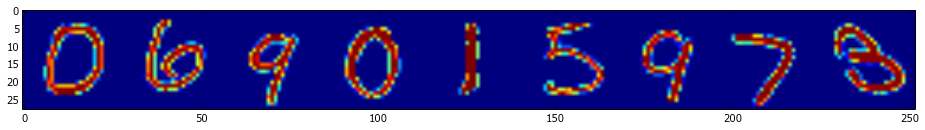

In [244]:
sample = mnist.test.images[10:19,:].T.reshape(28, 28, -1)
pt.imshow(np.hstack([sample[:,:,i] for i in range(9)]))

In [153]:
%matplotlib inline

In [245]:
U, s, V = randomized_svd.randomized_svd(mnist.train.images[:1000,:])

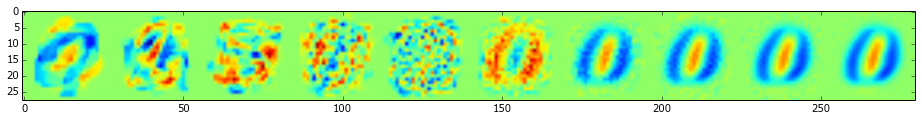

In [296]:
Vs = []
Ve = None
for k in [4,10,30,50,100,150,200,300,400,500]:
    V = randomized_svd.pca(mnist.train.images[:5000,:], k=k)[0,:].reshape(28,28)
    if k == 500:
        Ve = randomized_svd.pca(mnist.train.images[:5000,:], k=k)
    Vs.append(V)
Vimgs = np.hstack(Vs)
pt.imshow(Vimgs)

In [228]:
def compute_errs(err_func, ks=list(range(3,10))):
    errs = []
    times = []
    n_try = 10
    for k in ks:
        errs_iter = []
        times_iter = []
        for _ in range(n_try):
            start = time.time()
            errs_iter.append(err_func(k))
            times_iter.append(time.time() - start)
        errs.append(np.mean(errs_iter))
        times.append(np.mean(times_iter))
    return errs, times

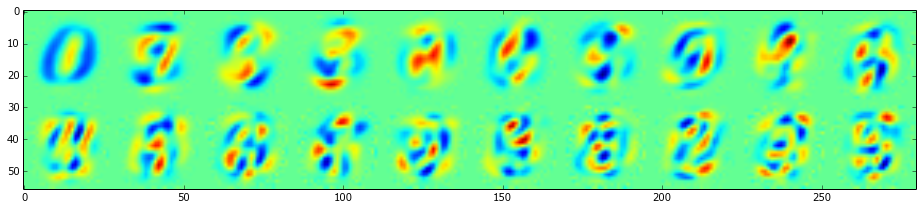

In [299]:
montage = viz.pca_montage(Ve[:20,:], grid_width=10)
pt.imshow(montage)

In [229]:
def get_color_cycle(n=48, shuffle=False):
    if shuffle:
        perm = np.random.RandomState(42).permutation(n)
    else:
        perm = range(n)
    return itertools.cycle(cm.rainbow(np.linspace(0,1,n))[perm,:])

In [230]:
from sklearn.utils import extmath

def sklearn_randomized_svd(A, k=10):
    U, S, VT = extmath.randomized_svd(A, n_components=k)
    return U, S, VT



In [280]:
ks = list(range(10,300,30))
A = test_randomized_svd.lowrank(5000,800)


ours_svd_err_Y, ours_svd_time_Y = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=False), ks=ks)

ours_svd_err_iter_0, ours_svd_time_iter_0 = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=True, iter=0), ks=ks)

ours_svd_err_iter_1, ours_svd_time_iter_1 = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=True, iter=1), ks=ks)

ours_svd_err_iter_2, ours_svd_time_iter_2 = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=True, iter=2), ks=ks)

ours_svd_err_iter_3, ours_svd_time_iter_3 = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=True, iter=3), ks=ks)

ours_svd_err_iter_4, ours_svd_time_iter_4 = compute_errs(lambda k: randomized_svd.svd_err(
        randomized_svd.randomized_svd, k=k, A=A, compute_Q=True, iter=4), ks=ks)

sklearn_svd_err, sklearn_svd_time = compute_errs(lambda k: randomized_svd.svd_err(
        sklearn_randomized_svd, k=k, A=A), ks=ks)

fbpca_svd_err, fbpca_svd_time = compute_errs(lambda k: randomized_svd.svd_err(
        fbpca.pca, A=A, k=k, raw=True), ks=ks)



KeyboardInterrupt: 

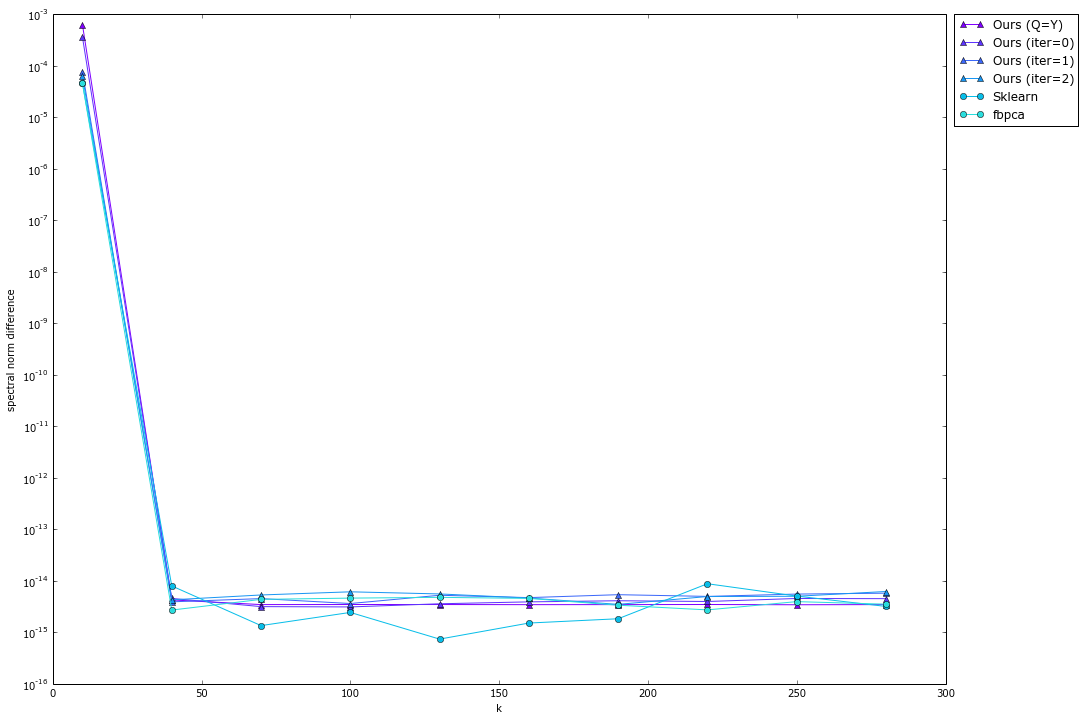

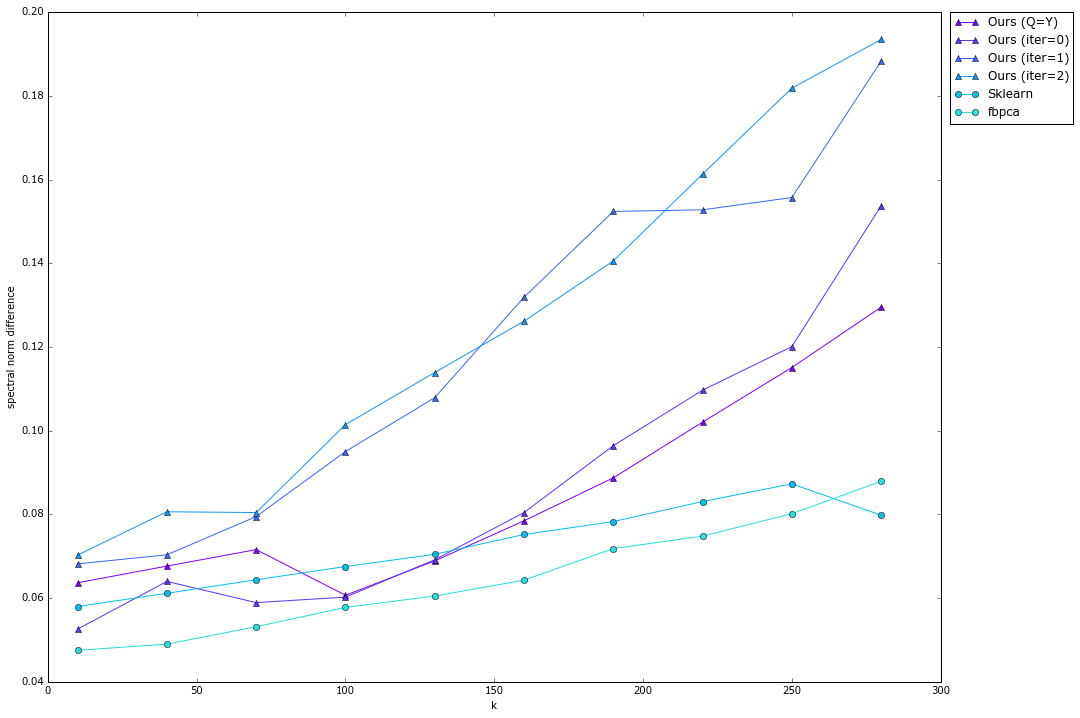

In [711]:
cc=get_color_cycle(8)
pt.semilogy(ks, ours_svd_err_Y, 'y-^', label="Ours (Q=Y)", color=next(cc))
pt.semilogy(ks, ours_svd_err_iter_0, 'm-^', label="Ours (iter=0)", color=next(cc))
pt.semilogy(ks, ours_svd_err_iter_1, 'c-^', label="Ours (iter=1)", color=next(cc))
pt.semilogy(ks, ours_svd_err_iter_2, 'k-^', label="Ours (iter=2)", color=next(cc))
pt.semilogy(ks, sklearn_svd_err, 'b-o', label="Sklearn", color=next(cc))
pt.semilogy(ks, fbpca_svd_err, 'g-o', label="fbpca", color=next(cc))
pt.xlabel("k")
pt.ylabel("spectral norm difference")
pt.legend(loc=2, borderaxespad=0, bbox_to_anchor=(1.01, 1))
pt.show()

cc=get_color_cycle(8)
pt.plot(ks, ours_svd_time_Y, 'y-^', label="Ours (Q=Y)", color=next(cc))
pt.plot(ks, ours_svd_time_iter_0, 'm-^', label="Ours (iter=0)", color=next(cc))
pt.plot(ks, ours_svd_time_iter_1, 'c-^', label="Ours (iter=1)", color=next(cc))
pt.plot(ks, ours_svd_time_iter_2, 'k-^', label="Ours (iter=2)", color=next(cc))
pt.plot(ks, sklearn_svd_time, 'b-o', label="Sklearn", color=next(cc))
pt.plot(ks, fbpca_svd_time, 'g-o', label="fbpca", color=next(cc))
pt.xlabel("k")
pt.ylabel("time (seconds)")
pt.legend(loc=2, borderaxespad=0, bbox_to_anchor=(1.01, 1))
pt.show()

In [599]:
next(cc)

array([ 0.65294118,  0.97128103,  0.61727822,  1.        ])

In [21]:
A = test_randomized_svd.lowrank(100,100)
(U, s, Va) = fbpca.pca(A, k=10, raw=True)
la.norm((U*s).dot(Va)-A, 2)

4.5399929762484807e-05

In [36]:
images = mnist.train.images.T.reshape(28,28,-1)

In [37]:
def sample_patches(images, patch_width=int(images.shape[0]/4), step=2, sample_ratio=0.1):
    s = patch_width
    patches = []
    sample_size = int(images.shape[2]*sample_ratio)
    for j in range(0, images.shape[0]-s, step):
        for i in range(0, images.shape[1]-s, step):
            chosen = np.random.choice(images.shape[2], sample_size, replace=False)
            patches.append(images[i:i+s,j:j+s,chosen].astype(np.int32).reshape(s*s,-1).T)

    return np.vstack(patches)

def prepare_patches(images, patch_width, step, sample_ratio=0.1):
    patches = sample_patches(images, patch_width, step, sample_ratio)
    return patches-patches.mean(axis=1).reshape(-1,1)

In [17]:
patches = prepare_patches(images, patch_width=13, step=1, sample_ratio=0.1)
_,_,V = fbpca.pca(patches, k=8)

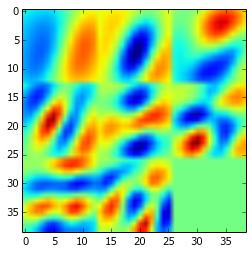

In [26]:
im = viz.pca_montage(V)
pt.imshow(im)

In [15]:
def training_set(size=None):
    images = mnist.train.images.T.reshape(28,28,-1)
    
    if size is None:
        subc = range(images.shape[2])
    else:
        subc = np.random.choice(images.shape[2], size)
    imgs = images[:,:,subc]
    labels = np.array([np.nonzero(mnist.train.labels[i,:])[0][0] for i in range(mnist.train.labels.shape[0])])
    labels = labels[subc]
    return imgs, labels

In [16]:
def testing_set():
    imgs = mnist.test.images.T.reshape(28,28,-1)
    labels = np.array([np.nonzero(mnist.test.labels[i,:])[0][0] for i in range(mnist.test.labels.shape[0])])
    return imgs, labels

In [457]:
patches = prepare_patches(filtered, patch_width=13, step=1, sample_ratio=0.1)
_,_,V = fbpca.pca(patches, k=8)

In [30]:
def convolve(images, f):
    from scipy import signal
    return signal.fftconvolve(images, f, mode='same')

In [47]:
def theano_convolution(images, filters):
    import theano
    import theano.tensor as T
    from theano.tensor.nnet import conv
    
    x = T.dtensor4(name='x')
    W = T.dtensor4(name='W')
    conv_expr = conv.conv2d(x, W, border_mode='full')
    conv_func = theano.function([x,W], outputs=conv_expr)
    
    offset = int(filters.shape[0]/2-0.5)
    os = images.shape[0]
    out = conv_func(images[:,:,:, np.newaxis].transpose(2,3,0,1),
                    filters[:,:,:,np.newaxis].transpose([2,3,0,1])
                   )[:,:,offset:os+offset,offset:os+offset]
    return out

In [82]:
def pca_filters(images):
    patches = prepare_patches(images, patch_width=17, step=2, sample_ratio=0.1)
    _,_,V = fbpca.pca(patches, k=8)
    filters = V.T.reshape((int(math.sqrt(V.shape[1]))), int(math.sqrt(V.shape[1])), -1)
    return filters

In [134]:
def pca_level(images, use_gpu=False):
    filters = pca_filters(images)

    if use_gpu:
        f = theano_convolution(images, filters)
        f = f.transpose([2,3,0,1])
        filtered_images = [f[:,:,:,i] for i in range(f.shape[3])]
    else:
        filtered_images = [convolve(images, filters[:,:,i,np.newaxis]) for i in range(filters.shape[2])]
    return filters, filtered_images

In [26]:
def train_pcanet(images):
    level1_filters, level1_images = pca_level(images)
    level2_filters, level2_images = zip(*[pca_level(imgs) for imgs in level1_images])
    return level1_filters, level2_filters, level2_images

In [25]:
def hash_output(level2_images):
    imset = np.concatenate([imset[:,:,:,np.newaxis] for imset in level2_images], axis=3).transpose([3,0,1,2])
    imset_bin = (imset>0).astype(np.ubyte)
    assert imset_bin.shape[0] == 8
    return sum([imset_bin[i]<<i for i in range(imset_bin.shape[0])])

In [24]:
def sample_blocks(image, block_size, overlap=True):
    step = int(block_size/2) if overlap else block_size
    blocks = []
    for i in range(0, images.shape[0]-block_size+1, step):
        for j in range(0, images.shape[1]-block_size+1, step):
            blocks.append(image[i:i+block_size,j:j+block_size,:].astype(np.uint8).reshape(
                    block_size**2,-1).T)
    blocks = np.dstack(blocks)
    return blocks.transpose([1, 2, 0])

In [23]:
def compute_features(level2_image_tree):
    for level2_images in level2_image_tree:
        hashed = hash_output(level2_images)
        B = sample_blocks(hashed, 14, overlap=True)

    return np.vstack(
        np.hstack(np.histogram(B[:,i,j], bins=256)[0] for i in range(B.shape[1]))
        for j in range(B.shape[2]))

In [147]:
ts = training_set(2000)
pca_train = train_pcanet(ts[0])
feat = compute_features(pca_train[2])

In [148]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(svm.SVC(kernel='linear'))
clf.fit(feat, ts[1])

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=1)

In [149]:
def pcanet_test(ts, all_filters):
    pca_train = train_pcanet(ts[0])
    feat = compute_features(pca_train[2])

    predicted = clf.predict(feat)
    correct = abs(ts[1] - predicted) < 1e-10
    return np.count_nonzero(correct.astype(np.int))/correct.shape[0]

In [150]:
ts = training_set(100)

In [151]:
pcanet_test(ts, pca_train)

0.1

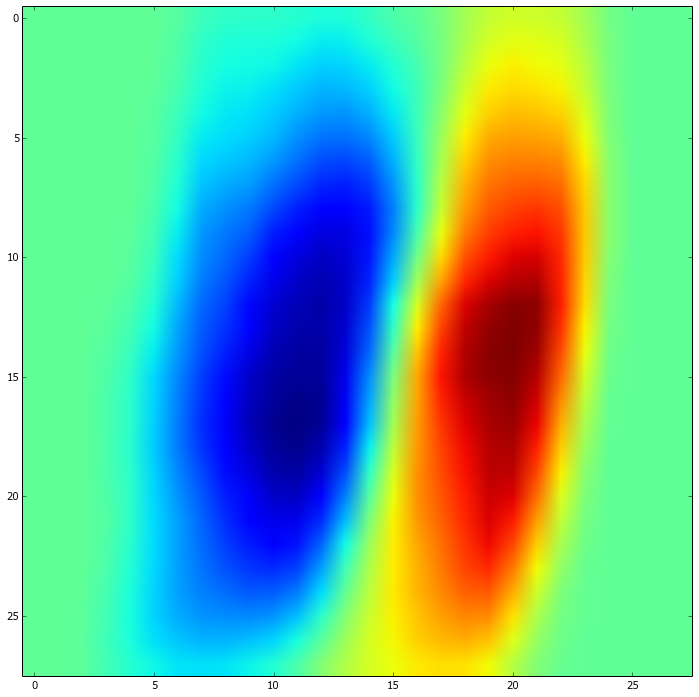

In [352]:
pt.imshow(out[4,0,:,:])

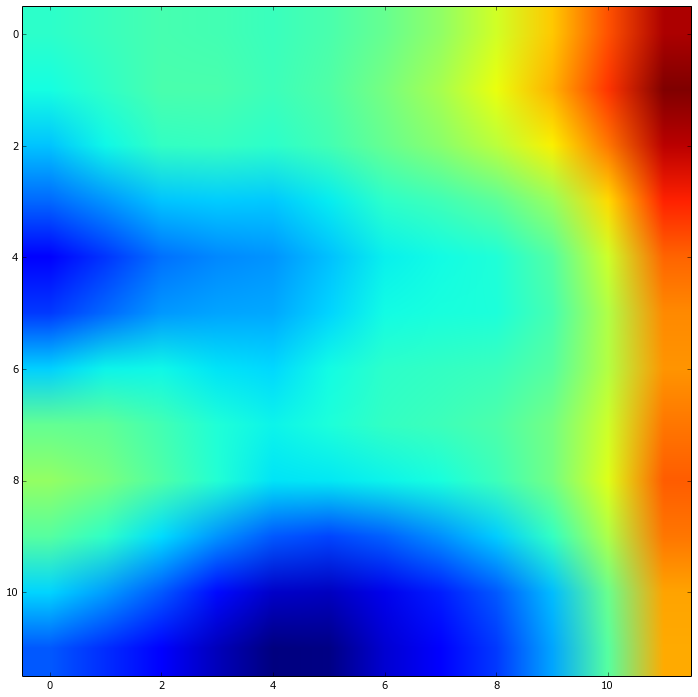

In [314]:
pt.imshow(out[0,0,:,:])